In [38]:
import pandas as pd
import seaborn as sns
%matplotlib inline

## Task 1

### POLITICAL SEATS DATAFRAME

In [39]:
political_seats = pd.read_csv("../datasets/political_seats.csv", encoding="iso8859_10", header=1)
political_seats

,region,party,1973,1976,1979,1982,1985,1988,1991,1994,1998,2002,2006,2010,2014,2018,2022
0,0114 Upplands Väsby,The Moderate Party,6,7,10,13,13,12,15,14,16,11,17,17,13,12,11
1,0114 Upplands Väsby,The Centre Party,9,7,6,4,2,2,2,2,2,2,2,2,2,2,2
2,0114 Upplands Väsby,The Liberal Party,4,5,5,3,6,7,6,4,4,8,6,6,4,3,2
3,0114 Upplands Väsby,The Christian Democratic Party,0,0,0,1,0,0,2,1,3,3,3,2,2,3,2
4,0114 Upplands Väsby,The Green Party,..,..,..,1,2,4,2,3,2,2,3,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,2584 Kiruna,The Green Party,..,..,..,0,0,1,1,2,1,2,1,1,1,0,0
2615,2584 Kiruna,The Social Democratic Party,22,24,25,27,26,25,23,14,16,15,16,16,15,12,19
2616,2584 Kiruna,The Left Party,9,8,7,8,8,8,8,8,5,6,5,6,4,3,4
2617,2584 Kiruna,The Sweden Democrats,..,..,..,..,..,0,0,0,0,0,0,0,1,2,2


In [40]:
# ".." in this case is a null value.
print(political_seats.eq("..").sum())
political_seats = political_seats.replace("..", 0)
political_seats.eq("..").any()

region      0
party       0
1973      673
1976      680
1979      666
1982      347
1985      347
1988       63
1991       45
1994       27
1998       18
2002        9
2006        9
2010        9
2014        9
2018        0
2022        0
dtype: int64


region    False
party     False
1973      False
1976      False
1979      False
1982      False
1985      False
1988      False
1991      False
1994      False
1998      False
2002      False
2006      False
2010      False
2014      False
2018      False
2022      False
dtype: bool

In [41]:
political_seats = political_seats.melt(id_vars=["region", "party"], var_name="year", value_name="value")
political_seats = political_seats.pivot_table(index=["year", "region"], columns="party", values="value")
political_seats

party                     Other Parties  The Centre Party  \
year region                                                 
1973 0114 Upplands Väsby            0.0               9.0   
     0115 Vallentuna                0.0              12.0   
     0117 Österåker                 0.0               0.0   
     0120 Värmdö                    0.0               8.0   
     0123 Järfälla                  0.0              10.0   
...                                 ...               ...   
2022 2580 Luleå                     2.0               4.0   
     2581 Piteå                     3.0               5.0   
     2582 Boden                     4.0               3.0   
     2583 Haparanda                 2.0               6.0   
     2584 Kiruna                    6.0               4.0   

party                     The Christian Democratic Party  The Green Party  \
year region                                                                 
1973 0114 Upplands Väsby                             0.0              0.0   
     0115 Vallentuna                                 0.0              0.0   
     0117 Österåker                                  0.0              0.0   
     0120 Värmdö                                     0.0              0.0   
     0123 Järfälla                                   0.0              0.0   
...                                                  ...              ...   
2022 2580 Luleå                                      4.0              2.0   
     2581 Piteå                                      2.0              1.0   
     2582 Boden                                      1.0              0.0   
     2583 Haparanda                                  2.0              0.0   
     2584 Kiruna                                     5.0              0.0   

party                     The Left Party  The Liberal Party  \
year region                                                   
1973 0114 Upplands Väsby             3.0                4.0   
     0115 Vallentuna                 2.0                6.0   
     0117 Österåker                  0.0                0.0   
     0120 Värmdö                     3.0                4.0   
     0123 Järfälla                   3.0                7.0   
...                                  ...                ...   
2022 2580 Luleå                      6.0                3.0   
     2581 Piteå                      5.0                0.0   
     2582 Boden                      3.0                0.0   
     2583 Haparanda                  1.0                0.0   
     2584 Kiruna                     4.0                0.0   

party                     The Moderate Party  The Social Democratic Party  \
year region                                                                 
1973 0114 Upplands Väsby                 6.0                         19.0   
     0115 Vallentuna                     7.0                         14.0   
     0117 Österåker                      0.0                          0.0   
     0120 Värmdö                         7.0                         19.0   
     0123 Järfälla                      10.0                         21.0   
...                                      ...                          ...   
2022 2580 Luleå                         10.0                         24.0   
     2581 Piteå                          8.0                         22.0   
     2582 Boden                          7.0                         24.0   
     2583 Haparanda                      4.0                         12.0   
     2584 Kiruna                         5.0                         19.0   

party                     The Sweden Democrats  
year region                                     
1973 0114 Upplands Väsby                   0.0  
     0115 Vallentuna                       0.0  
     0117 Österåker                        0.0  
     0120 Värmdö                           0.0  
     0123 Järfälla                         0.0  
...                                    

### INCOME STATEMENTS DATAFRAME

In [42]:
income = pd.read_csv("../datasets/income_statements.csv", encoding="iso8859_10", header=1)

In [43]:
income = income.drop("2022", axis=1)
income = income.melt(id_vars=["region", "Income statement"], var_name="year", value_name="value")

In [44]:
income = income.replace("..", 0)

In [45]:
income["value"] = income["value"].astype(float)

In [46]:
income

,region,Income statement,year,value
0,0114 Upplands Väsby,Total income for operations,1998,313859.0
1,0114 Upplands Väsby,Total costs for operations,1998,-1141598.0
2,0114 Upplands Väsby,Total net current costs,1998,-889629.0
3,0114 Upplands Väsby,Tax revenues,1998,897383.0
4,0114 Upplands Väsby,General grants and equalisation grants,1998,45111.0
...,...,...,...,...
69595,2584 Kiruna,Net profit/loss for operations,2021,801487.0
69596,2584 Kiruna,Financial income,2021,14378.0
69597,2584 Kiruna,Financial costs,2021,-16791.0
69598,2584 Kiruna,Net profit/loss after financial items,2021,799074.0


In [47]:
#df.loc[df["Product Type"].isin(["Coffee", "Espresso"])].index.to_list()
regions =  income["region"].unique().tolist()
#print(regions)
#vf = income.loc[income.loc[income["region"].isin(['0114 Upplands Väsby'])].index.to_list(), ["region", "year", "value"]]
#vf.loc[0::10][4:4]
#vf.loc[0::10]
#print(vf.loc[0::10][4*8:4*8+1:]["value"])#[start:stop:step]
tmp = pd.DataFrame(columns=income.columns.to_list())
for reg in regions:
  vf = income.loc[income.loc[income["region"].isin([reg])].index.to_list()]
  vf = vf.reset_index()
  for feat in range(10): # len featuers
    fea_df = vf.loc[feat::10].reset_index()
    for i in range(int(len(fea_df["year"])/4)):
      row = pd.DataFrame([{
        "region":fea_df.loc[i, "region"],
        "Income statement": fea_df.loc[i, "Income statement"],
        "year":fea_df.loc[i*4, "year"],
        "value":fea_df.loc[4*i:4*(i+1)]["value"].mean()
        }])
      tmp = pd.concat([tmp, row])

In [48]:
tmp  = tmp.reset_index().drop("index", axis=1)

In [49]:
tmp

,region,Income statement,year,value
0,0114 Upplands Väsby,Total income for operations,1998,325932.8
1,0114 Upplands Väsby,Total income for operations,2002,319815.0
2,0114 Upplands Väsby,Total income for operations,2006,358176.2
3,0114 Upplands Väsby,Total income for operations,2010,459360.6
4,0114 Upplands Väsby,Total income for operations,2014,569602.6
...,...,...,...,...
17395,2584 Kiruna,Net profit/loss for the year,2002,8888.8
17396,2584 Kiruna,Net profit/loss for the year,2006,20779.2
17397,2584 Kiruna,Net profit/loss for the year,2010,81600.0
17398,2584 Kiruna,Net profit/loss for the year,2014,655998.6


In [50]:
income = tmp.pivot_table(index=["year", "region"], columns="Income statement", values="value")
income

Income statement          Financial costs  Financial income  \
year region                                                   
1998 0114 Upplands Väsby        -20390.60           8984.60   
     0115 Vallentuna             -4547.20           4123.00   
     0117 Österåker              -9773.80           2411.00   
     0120 Värmdö                 -2957.00          10727.40   
     0123 Järfälla              -26190.80          36771.60   
...                                   ...               ...   
2018 2580 Luleå                 -10524.00          73095.00   
     2581 Piteå                  -7309.00          36765.25   
     2582 Boden                  -6486.50           7889.00   
     2583 Haparanda              -6828.25           5944.75   
     2584 Kiruna                -17938.50          13694.00   

Income statement          General grants and equalisation grants  \
year region                                                        
1998 0114 Upplands Väsby                                10179.40   
     0115 Vallentuna                                    52571.00   
     0117 Österåker                                     -4838.40   
     0120 Värmdö                                        57062.00   
     0123 Järfälla                                     -35627.80   
...                                                          ...   
2018 2580 Luleå                                        633685.75   
     2581 Piteå                                        448301.50   
     2582 Boden                                        464836.25   
     2583 Haparanda                                    266574.50   
     2584 Kiruna                                       203822.75   

Income statement          Net profit/loss after financial items  \
year region                                                       
1998 0114 Upplands Väsby                               22501.20   
     0115 Vallentuna                                   -8081.00   
     0117 Österåker                                   -12251.60   
     0120 Värmdö                                       -4532.20   
     0123 Järfälla                                     -1105.20   
...                                                         ...   
2018 2580 Luleå                                       243807.50   
     2581 Piteå                                       121148.00   
     2582 Boden                                        -1115.75   
     2583 Haparanda                                    39768.75   
     2584 Kiruna                                      456764.00   

Income statement          Net profit/loss for operations  \
year region                                                
1998 0114 Upplands Väsby                             0.0   
     0115 Vallentuna                                 0.0   
     0117 Österåker                                  0.0   
     0120 Värmdö                                     0.0   
     0123 Järfälla                                   0.0   
...                                                  ...   
2018 2580 Luleå                                 189190.5   
     2581 Piteå                                  79501.5   
     2582 Boden                                   1438.0   
     2583 Haparanda                              28813.0   
     2584 Kiruna                                306195.5   

Income statement          Net profit/loss for the year  Tax revenues  \
year region                                                            
1998 0114 Upplands Väsby                      86213.80    1035853.20   
     0115 Vallentuna                           5611.80     600340.40   
     0117 Österåker                           13748.40     950220.60   
     0120 Värmdö                             -13729.40     762257.20   
     0123 Järfälla                            -1105.20    1690228.80   
...                                                ...           ...   
2018 2580 Luleå                              243807.50    4148595.

### Data Prep

In [51]:
income

Income statement          Financial costs  Financial income  \
year region                                                   
1998 0114 Upplands Väsby        -20390.60           8984.60   
     0115 Vallentuna             -4547.20           4123.00   
     0117 Österåker              -9773.80           2411.00   
     0120 Värmdö                 -2957.00          10727.40   
     0123 Järfälla              -26190.80          36771.60   
...                                   ...               ...   
2018 2580 Luleå                 -10524.00          73095.00   
     2581 Piteå                  -7309.00          36765.25   
     2582 Boden                  -6486.50           7889.00   
     2583 Haparanda              -6828.25           5944.75   
     2584 Kiruna                -17938.50          13694.00   

Income statement          General grants and equalisation grants  \
year region                                                        
1998 0114 Upplands Väsby                                10179.40   
     0115 Vallentuna                                    52571.00   
     0117 Österåker                                     -4838.40   
     0120 Värmdö                                        57062.00   
     0123 Järfälla                                     -35627.80   
...                                                          ...   
2018 2580 Luleå                                        633685.75   
     2581 Piteå                                        448301.50   
     2582 Boden                                        464836.25   
     2583 Haparanda                                    266574.50   
     2584 Kiruna                                       203822.75   

Income statement          Net profit/loss after financial items  \
year region                                                       
1998 0114 Upplands Väsby                               22501.20   
     0115 Vallentuna                                   -8081.00   
     0117 Österåker                                   -12251.60   
     0120 Värmdö                                       -4532.20   
     0123 Järfälla                                     -1105.20   
...                                                         ...   
2018 2580 Luleå                                       243807.50   
     2581 Piteå                                       121148.00   
     2582 Boden                                        -1115.75   
     2583 Haparanda                                    39768.75   
     2584 Kiruna                                      456764.00   

Income statement          Net profit/loss for operations  \
year region                                                
1998 0114 Upplands Väsby                             0.0   
     0115 Vallentuna                                 0.0   
     0117 Österåker                                  0.0   
     0120 Värmdö                                     0.0   
     0123 Järfälla                                   0.0   
...                                                  ...   
2018 2580 Luleå                                 189190.5   
     2581 Piteå                                  79501.5   
     2582 Boden                                   1438.0   
     2583 Haparanda                              28813.0   
     2584 Kiruna                                306195.5   

Income statement          Net profit/loss for the year  Tax revenues  \
year region                                                            
1998 0114 Upplands Väsby                      86213.80    1035853.20   
     0115 Vallentuna                           5611.80     600340.40   
     0117 Österåker                           13748.40     950220.60   
     0120 Värmdö                             -13729.40     762257.20   
     0123 Järfälla                            -1105.20    1690228.80   
...                                                ...           ...   
2018 2580 Luleå                              243807.50    4148595.

In [52]:
df = political_seats.merge(income, left_on=["year", "region"], right_on=["year", "region"])
df

Other Parties  The Centre Party  \
year region                                                 
1998 0114 Upplands Väsby            1.0               2.0   
     0115 Vallentuna                1.0               4.0   
     0117 Österåker                 2.0               2.0   
     0120 Värmdö                    0.0               2.0   
     0123 Järfälla                  0.0               2.0   
...                                 ...               ...   
2018 2580 Luleå                     6.0               5.0   
     2581 Piteå                     7.0               6.0   
     2582 Boden                    10.0               3.0   
     2583 Haparanda                 6.0               7.0   
     2584 Kiruna                    9.0              15.0   

                          The Christian Democratic Party  The Green Party  \
year region                                                                 
1998 0114 Upplands Väsby                             3.0              2.0   
     0115 Vallentuna                                 4.0              2.0   
     0117 Österåker                                  4.0              2.0   
     0120 Värmdö                                     2.0              2.0   
     0123 Järfälla                                   6.0              2.0   
...                                                  ...              ...   
2018 2580 Luleå                                      2.0              2.0   
     2581 Piteå                                      2.0              1.0   
     2582 Boden                                      0.0              1.0   
     2583 Haparanda                                  2.0              0.0   
     2584 Kiruna                                     1.0              0.0   

                          The Left Party  The Liberal Party  \
year region                                                   
1998 0114 Upplands Väsby             5.0                4.0   
     0115 Vallentuna                 3.0                2.0   
     0117 Österåker                  3.0                3.0   
     0120 Värmdö                     3.0                2.0   
     0123 Järfälla                   5.0                5.0   
...                                  ...                ...   
2018 2580 Luleå                      6.0                3.0   
     2581 Piteå                      6.0                1.0   
     2582 Boden                      3.0                2.0   
     2583 Haparanda                  1.0                0.0   
     2584 Kiruna                     3.0                0.0   

                          The Moderate Party  The Social Democratic Party  \
year region                                                                 
1998 0114 Upplands Väsby                16.0                         18.0   
     0115 Vallentuna                    16.0                          9.0   
     0117 Österåker                     20.0                         15.0   
     0120 Värmdö                        17.0                         13.0   
     0123 Järfälla                      18.0                         23.0   
...                                      ...                          ...   
2018 2580 Luleå                          9.0                         24.0   
     2581 Piteå                          6.0                         19.0   
     2582 Boden                          8.0                         17.0   
     2583 Haparanda                      4.0                         10.0   
     2584 Kiruna                         3.0                         12.0   

                          The Sweden Democrats  Financial costs  \
year region                                                       
1998 0114 Upplands Väsby                   0.0        -20390.60   
     0115 Vallentuna                       0.0         -4547.20   
     0117 Österåker                        0.0         -9773.80   
     0120 Värmdö                           0.0         -2957.00   
     0

In [53]:
df.loc['2018']

,Other Parties,The Centre Party,The Christian Democratic Party,The Green Party,The Left Party,The Liberal Party,The Moderate Party,The Social Democratic Party,The Sweden Democrats,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
region,,,,,,,,,,,,,,,,,,,
0114 Upplands Väsby,5.0,2.0,3.0,2.0,4.0,3.0,12.0,13.0,7.0,-20137.75,13044.25,465663.50,116009.25,120294.00,116009.25,2097598.00,-3046138.00,731624.25,-2440158.50
0115 Vallentuna,0.0,6.0,3.0,3.0,2.0,5.0,15.0,10.0,7.0,-20395.75,1629.50,250137.75,112343.50,117831.25,112343.50,1663577.75,-2117098.25,418199.75,-1782606.25
0117 Österåker,5.0,3.0,2.0,2.0,3.0,4.0,18.0,9.0,5.0,-18807.75,57057.25,317574.25,139721.50,109304.50,139721.50,2001010.25,-2637426.75,458266.50,-2217112.75
0120 Värmdö,0.0,5.0,3.0,3.0,2.0,3.0,14.0,14.0,7.0,-23350.25,4406.25,273084.50,126547.25,141790.00,126547.25,2200877.25,-3036618.50,849809.75,-2328470.50
0123 Järfälla,0.0,3.0,4.0,3.0,5.0,5.0,15.0,18.0,8.0,-54343.75,19442.00,862297.50,379617.25,366249.25,246599.25,3559942.50,-5236158.00,1500153.00,-4007721.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580 Luleå,6.0,5.0,2.0,2.0,6.0,3.0,9.0,24.0,4.0,-10524.00,73095.00,633685.75,243807.50,189190.50,243807.50,4148595.75,-5460671.25,1211377.50,-4601045.00
2581 Piteå,7.0,6.0,2.0,1.0,6.0,1.0,6.0,19.0,3.0,-7309.00,36765.25,448301.50,121148.00,79501.50,121148.00,2135083.25,-3002284.00,629801.25,-2491693.00
2582 Boden,10.0,3.0,0.0,1.0,3.0,2.0,8.0,17.0,5.0,-6486.50,7889.00,464836.25,-1115.75,1438.00,-1115.75,1425960.00,-2320048.00,519172.75,-1893314.50


In [54]:
right = df.apply(lambda row: sum(row[["The Christian Democratic Party", "The Liberal Party", "The Moderate Party"]]), axis=1).to_numpy()
centre = df.apply(lambda row: sum(row[["The Centre Party"]]), axis=1).to_numpy()
left = df.apply(lambda row: sum(row[["The Green Party", "The Left Party", "The Social Democratic Party"]]), axis=1).to_numpy()
indices = df.index.to_numpy()

In [55]:
majority = []
for i in range(len(right)):
    if indices[i][0] == "2018":
        if left[i] + centre[i] > right[i]:
            majority.append("left")
        elif left[i] + centre[i] < right[i]:
            majority.append("right")
        else:
            majority.append("tie")
    else:
        if left[i] > right[i] + centre[i]:
            majority.append("left")
        elif left[i] < right[i] + centre[i]:
            majority.append("right")
        else:
            majority.append("tie")

In [56]:
df["majority"] = majority

## Task 2

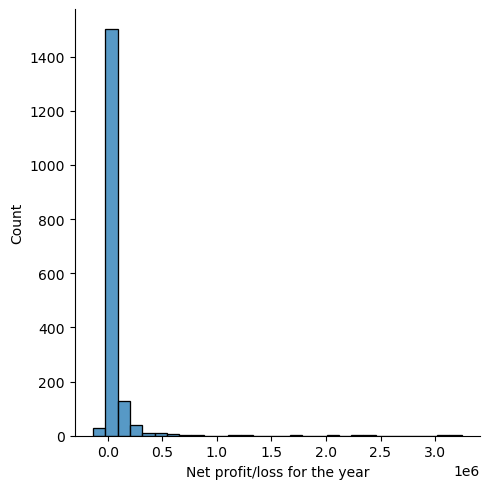

In [64]:
sns.displot(data=df, x="Net profit/loss for the year", bins=30)

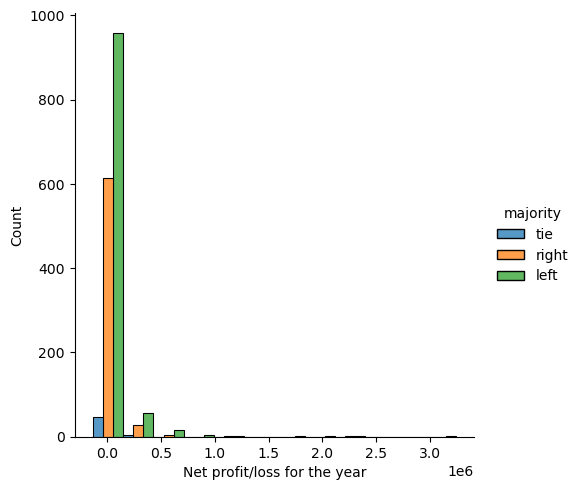

In [57]:
sns.displot(data=df, bins=12, x="Net profit/loss for the year", hue="majority", multiple="dodge")

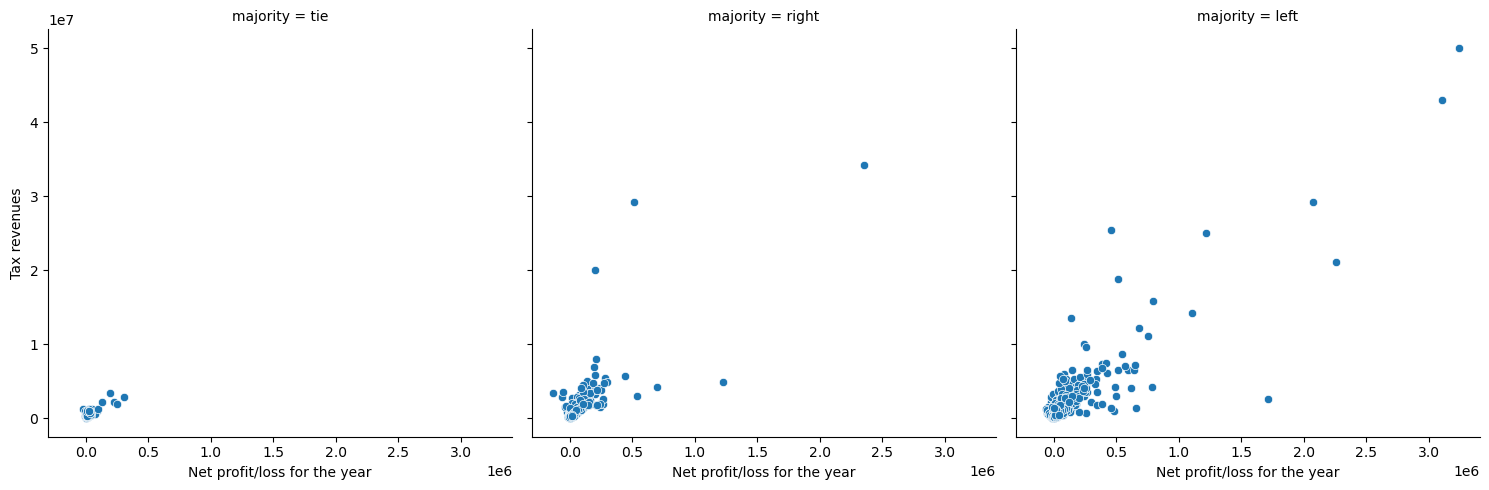

In [60]:
sns.relplot(data=df, x="Net profit/loss for the year", y="Tax revenues", col="majority")

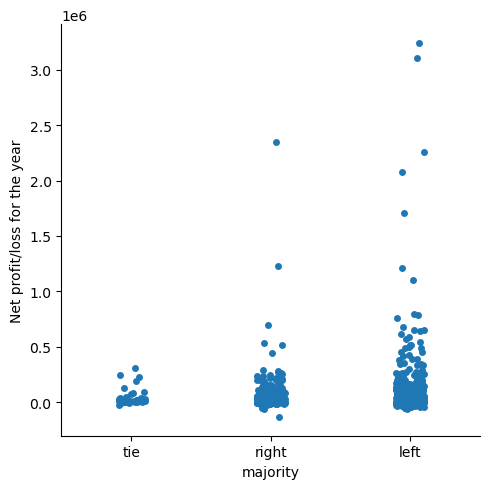

In [65]:
sns.catplot(data=df, x="majority", y="Net profit/loss for the year")

<Axes: xlabel='Tax revenues', ylabel='Net profit/loss for the year'>

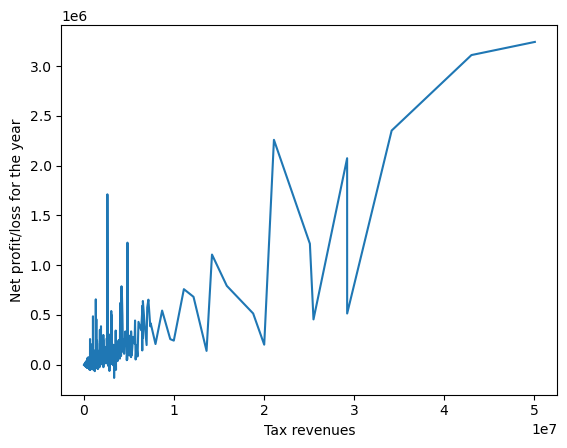

In [67]:
sns.lineplot(data=df, x="Tax revenues", y="Net profit/loss for the year")

## Task 3

## Task 4

## Task 5